In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from __future__ import print_function
from rdkit import Chem
from rdkit.Chem import AllChem

In [3]:
import sys,os
import rdkit
import networkx as nx
import pandas as pd

In [6]:
from tqdm import tqdm_notebook

In [4]:
xyzmols={}
suppl = Chem.SDMolSupplier('../input/xyz2mol.sdf',removeHs=False)
for mol in suppl:
    name=mol.GetProp("_Name").replace(".xyz","")
    xyzmols[name]=mol
len(xyzmols)

130760

In [5]:
graphmols={}
suppl = Chem.SDMolSupplier('../input/graph2mol.sdf',removeHs=False)
for mol in suppl:
    name=mol.GetProp("_Name")
    graphmols[name]=mol
len(graphmols)

130775

In [10]:
molnames=sorted(list(set(list(xyzmols.keys())+list(graphmols.keys()))))
len(molnames)

130775

In [57]:
checkstatus={}
for molname in tqdm_notebook(molnames):
    err_msg=""
    if molname not in xyzmols:
        err_msg += " mol not in xyz. "
    if molname not in graphmols:
        err_msg += " mol not in graph. "        
    if not err_msg:
        mol1=xyzmols[molname]
        mol2=graphmols[molname]
        if Chem.MolToSmiles(mol1,isomericSmiles=False)==Chem.MolToSmiles(mol2,isomericSmiles=False):
            pass
        else:
            err_msg = " not equal "
    checkstatus[molname]=err_msg

In [58]:
df=pd.Series(checkstatus).to_frame().reset_index()
df.columns=['molname','msg']
df['has_error']=df['msg'].map(lambda u: u!="")

In [59]:
df.head()

molname msg  has_error
0  dsgdb9nsd_000001          False
1  dsgdb9nsd_000002          False
2  dsgdb9nsd_000003          False
3  dsgdb9nsd_000004          False
4  dsgdb9nsd_000005          False

In [60]:
df.has_error.sum(),df.shape

(3737, (130775, 3))

In [62]:
df.has_error.sum()/df.shape[0]

0.02857579812655324

In [63]:
dferror=df[df['has_error']]

In [64]:
dferror['msg'].map(lambda u: 'mol not in xyz' in u).sum()

15

In [65]:
dferror['msg'].map(lambda u: 'mol not in graph' in u).sum()

0

In [66]:
dferror['msg'].map(lambda u: 'not equal' in u).sum()

3722

In [67]:
dferror=dferror[dferror['msg'].map(lambda u: 'not equal' in u)]

In [68]:
dferror

molname          msg  has_error
192     dsgdb9nsd_000202   not equal        True
194     dsgdb9nsd_000204   not equal        True
196     dsgdb9nsd_000206   not equal        True
198     dsgdb9nsd_000208   not equal        True
200     dsgdb9nsd_000210   not equal        True
201     dsgdb9nsd_000211   not equal        True
259     dsgdb9nsd_000271   not equal        True
269     dsgdb9nsd_000282   not equal        True
708     dsgdb9nsd_000724   not equal        True
715     dsgdb9nsd_000731   not equal        True
717     dsgdb9nsd_000733   not equal        True
741     dsgdb9nsd_000761   not equal        True
743     dsgdb9nsd_000763   not equal        True
761     dsgdb9nsd_000782   not equal        True
818     dsgdb9nsd_000840   not equal        True
820     dsgdb9nsd_000842   not equal        True
821     dsgdb9nsd_000843   not equal        True
832     dsgdb9nsd_000854   not equal        True
833     dsgdb9nsd_000855   not equal        True
876     dsgdb9nsd_000909   not equal        True
877     dsgdb9nsd_000910   not equal        True
878     dsgdb9nsd_000911   not equal        True
879     dsgdb9nsd_000912   not equal        True
934     dsgdb9nsd_000968   not equal        True
940     dsgdb9nsd_000974   not equal        True
948     dsgdb9nsd_000982   not equal        True
970     dsgdb9nsd_001005   not equal        True
971     dsgdb9nsd_001006   not equal        True
972     dsgdb9nsd_001007   not equal        True
973     dsgdb9nsd_001008   not equal        True
...                  ...          ...        ...
129974  dsgdb9nsd_132959   not equal        True
129982  dsgdb9nsd_132970   not equal        True
129983  dsgdb9nsd_132972   not equal        True
129985  dsgdb9nsd_132974   not equal        True
129988  dsgdb9nsd_132978   not equal        True
130130  dsgdb9nsd_133139   not equal        True
130132  dsgdb9nsd_133141   not equal        True
130135  dsgdb9nsd_133145   not equal        True
130137  dsgdb9nsd_133147   not equal        True
130186  dsgdb9nsd_133208   not equal        True
130215  dsgdb9nsd_133240   not equal        True
130225  dsgdb9nsd_133254   not equal        True
130227  dsgdb9nsd_133257   not equal        True
130228  dsgdb9nsd_133258   not equal        True
130229  dsgdb9nsd_133259   not equal        True
130230  dsgdb9nsd_133261   not equal        True
130245  dsgdb9nsd_133285   not equal        True
130254  dsgdb9nsd_133295   not equal        True
130266  dsgdb9nsd_133307   not equal        True
130268  dsgdb9nsd_133309   not equal        True
130271  dsgdb9nsd_133313   not equal        True
130273  dsgdb9nsd_133315   not equal        True
130331  dsgdb9nsd_133383   not equal        True
130333  dsgdb9nsd_133385   not equal        True
130346  dsgdb9nsd_133401   not equal        True
130398  dsgdb9nsd_133464   not equal        True
130400  dsgdb9nsd_133466   not equal        True
130405  dsgdb9nsd_133471   not equal        True
130407  dsgdb9nsd_133473   not equal        True
130755  dsgdb9nsd_133863   not equal        True

[3722 rows x 3 columns]

In [69]:
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_useSVG = True
IPythonConsole.molSize=(600,400)
 
def mol_with_atom_index( mol ):
    atoms = mol.GetNumAtoms()
    for idx in range( atoms ):
        mol.GetAtomWithIdx( idx ).SetProp( 'molAtomMapNumber', str( mol.GetAtomWithIdx( idx ).GetIdx() ) )
    return mol

In [105]:
import re
lst=[]
for molname in dferror['molname']:
    mol1=xyzmols[molname]
    mol2=graphmols[molname]
    a,b=rdkit.Chem.rdMolDescriptors.CalcMolFormula(mol1),\
           rdkit.Chem.rdMolDescriptors.CalcMolFormula(mol2)
    lst.append(
        (molname,mol1.GetNumAtoms(),mol2.GetNumAtoms(),
          a,b, 
          np.array(re.findall(r'\d+', a)).astype(np.int).sum(),
          np.array(re.findall(r'\d+', b)).astype(np.int).sum()
         )
              )
    #break

In [109]:
df2=pd.DataFrame(lst, columns=['molname','atom1','atom2','f1','f2','n1','n2'])

In [111]:
df2.shape

(3722, 7)

In [117]:
(df2['atom1']==df2['atom2']).sum(),(df2['atom1']==df2['n1']).sum(),(df2['atom2']==df2['n2']).sum(),\
((df2['atom2']==df2['n1']) & (df2['atom2']==df2['n2'])).sum()

(3722, 1476, 347, 2)

In [116]:
df2

molname  atom1  atom2         f1         f2  n1  n2
0     dsgdb9nsd_000202     12     12     C4H6N2     C4H8N2  12  14
1     dsgdb9nsd_000204     11     11     C4H5NO     C4H7NO   9  11
2     dsgdb9nsd_000206     11     11     C3H5N3     C3H7N3  11  13
3     dsgdb9nsd_000208     10     10    C3H4N2O    C3H6N2O   9  11
4     dsgdb9nsd_000210     10     10    C3H4N2O    C3H6N2O   9  11
5     dsgdb9nsd_000211      9      9    C3H3NO2    C3H5NO2   8  10
6     dsgdb9nsd_000271     13     13    C3H7NO2    C3H9NO2  12  14
7     dsgdb9nsd_000282     10     10   C2H4N2O2   C2H6N2O2  10  12
8     dsgdb9nsd_000724      8      8     C2H2N4     C2H4N4   8  10
9     dsgdb9nsd_000731     11     11     C3H5N3     C3H7N3  11  13
10    dsgdb9nsd_000733     10     10    C3H4N2O    C3H6N2O   9  11
11    dsgdb9nsd_000761     10     10     C2H4N4     C2H6N4  10  12
12    dsgdb9nsd_000763      9      9    C2H3N3O    C2H5N3O   8  10
13    dsgdb9nsd_000782      9      9    C2H3N3O    C2H5N3O   8  10
14    dsgdb9nsd_000840     13     13    C4H6N2O    C4H8N2O  12  14
15    dsgdb9nsd_000842     13     13    C4H6N2O    C4H8N2O  12  14
16    dsgdb9nsd_000843     12     12    C4H5NO2    C4H7NO2  11  13
17    dsgdb9nsd_000854     12     12    C3H5N3O    C3H7N3O  11  13
18    dsgdb9nsd_000855     11     11   C3H4N2O2   C3H6N2O2  11  13
19    dsgdb9nsd_000909     12     12     C5H5NO     C5H7NO  10  12
20    dsgdb9nsd_000910     11     11    C4H4N2O    C4H6N2O  10  12
21    dsgdb9nsd_000911     11     11     C5H4O2     C5H6O2  11  13
22    dsgdb9nsd_000912     10     10    C4H3NO2    C4H5NO2   9  11
23    dsgdb9nsd_000968     13     13    C4H6N2O    C4H8N2O  12  14
24    dsgdb9nsd_000974     13     13    C4H6N2O    C4H8N2O  12  14
25    dsgdb9nsd_000982     12     12    C3H5N3O    C3H7N3O  11  13
26    dsgdb9nsd_001005     12     12      C6H5N      C6H7N  11  13
27    dsgdb9nsd_001006     11     11      C6H4O      C6H6O  10  12
28    dsgdb9nsd_001007     11     11     C5H4N2     C5H6N2  11  13
29    dsgdb9nsd_001008     10     10     C5H3NO     C5H5NO   8  10
...                ...    ...    ...        ...        ...  ..  ..
3692  dsgdb9nsd_132959     14     14   C5H5FN2O   C5H7FN2O  12  14
3693  dsgdb9nsd_132970     15     15    C6H6FNO    C6H8FNO  12  14
3694  dsgdb9nsd_132972     14     14   C5H5FN2O   C5H7FN2O  12  14
3695  dsgdb9nsd_132974     15     15    C6H6FNO    C6H8FNO  12  14
3696  dsgdb9nsd_132978     14     14   C5H5FN2O   C5H7FN2O  12  14
3697  dsgdb9nsd_133139     14     14    C4H5FN4    C4H7FN4  13  15
3698  dsgdb9nsd_133141     13     13   C4H4FN3O   C4H6FN3O  11  13
3699  dsgdb9nsd_133145     13     13   C4H4FN3O   C4H6FN3O  11  13
3700  dsgdb9nsd_133147     12     12  C4H3FN2O2  C4H5FN2O2  11  13
3701  dsgdb9nsd_133208     13     13   C5H4FNO2   C5H6FNO2  11  13
3702  dsgdb9nsd_133240     14     14   C5H5FN2O   C5H7FN2O  12  14
3703  dsgdb9nsd_133254     13     13   C4H4FN3O   C4H6FN3O  11  13
3704  dsgdb9nsd_133257     13     13   C4H4FN3O   C4H6FN3O  11  13
3705  dsgdb9nsd_133258     13     13    C3H4FN5    C3H6FN5  12  14
3706  dsgdb9nsd_133259     12     12   C3H3FN4O   C3H5FN4O  10  12
3707  dsgdb9nsd_133261     13     13   C4H4FN3O   C4H6FN3O  11  13
3708  dsgdb9nsd_133285     13     13    C3H4FN5    C3H6FN5  12  14
3709  dsgdb9nsd_133295     12     12   C3H3FN4O   C3H5FN4O  10  12
3710  dsgdb9nsd_133307     13     13    C3H4FN5    C3H6FN5  12  14
3711  dsgdb9nsd_133309     12     12   C3H3FN4O   C3H5FN4O  10  12
3712  dsgdb9nsd_133313     12     12   C3H3FN4O   C3H5FN4O  10  12
3713  dsgdb9nsd_133315     11     11  C3H2FN3O2  C3H4FN3O2  10  12
3714  dsgdb9nsd_133383     12     12  C4H3FN2O2  C4H5FN2O2  11  13
3715  dsgdb9nsd_133385     12     12  C4H3FN2O2  C4H5FN2O2  11  13
3716  dsgdb9nsd_133401     10     10   C3HF2N3O  C3H3F2N3O   8  11
3717  dsgdb9nsd_133464     12     12   C4H3F3N2   C4H5F3N2  12  14
3718  dsgdb9nsd_133466     11     11   C4H2F3NO   C4H4F3NO   9  11
3719  dsgdb9nsd_133471     11     11   C3H2F3N3   C3H4F3N3  11

In [118]:
molname='dsgdb9nsd_000204'
molname

'dsgdb9nsd_000204'

In [119]:
mol1=xyzmols[molname]
mol2=graphmols[molname]

In [120]:
mol1,mol2

(<rdkit.Chem.rdchem.Mol at 0x7f5ae346be40>,
 <rdkit.Chem.rdchem.Mol at 0x7f5ae25b5800>)

In [121]:
Chem.MolToSmiles(mol1,isomericSmiles=False),\
Chem.MolToSmiles(mol2,isomericSmiles=False)

('[H]c1nc(C([H])([H])[H])c([H])o1', '[H]C1N=C(C([H])([H])[H])C([H])O1')

In [122]:
Chem.MolToSmiles(mol1,isomericSmiles=False)==Chem.MolToSmiles(mol2,isomericSmiles=False)

False

In [123]:
print(Chem.MolToMolBlock(mol1))
print(Chem.MolToMolBlock(mol2))

dsgdb9nsd_000204.xyz
     RDKit          3D

 11 11  0  0  0  0  0  0  0  0999 V2000
   -0.0115    1.5003    0.0434 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0027    0.0110   -0.0273 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.0775   -0.8101   -1.1025 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.0227   -2.1070   -0.6642 O   0  0  0  0  0  0  0  0  0  0  0  0
    0.0897   -1.9935    0.6765 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.1107   -0.7806    1.1187 N   0  0  0  0  0  0  0  0  0  0  0  0
    0.9068    1.8773    0.5053 H   0  0  0  0  0  0  0  0  0  0  0  0
   -0.1020    1.9406   -0.9528 H   0  0  0  0  0  0  0  0  0  0  0  0
   -0.8489    1.8535    0.6541 H   0  0  0  0  0  0  0  0  0  0  0  0
   -0.1697   -0.6659   -2.1650 H   0  0  0  0  0  0  0  0  0  0  0  0
    0.1498   -2.9130    1.2376 H   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  1  7  1  0
  1  8  1  0
  1  9  1  0
  2  3  2  0
  2  6  1  0
  3  4  1  0
  3 10  1  0
  4  5  1  0
  5  6  2  0
  5 11  1  0
M 

In [124]:
rdkit.Chem.rdMolDescriptors.CalcMolFormula(mol1),\
rdkit.Chem.rdMolDescriptors.CalcMolFormula(mol2)

('C4H5NO', 'C4H7NO')

In [125]:
rdkit.Chem.rdMolDescriptors.CalcMolFormula(mol1,separateIsotopes=True),\
rdkit.Chem.rdMolDescriptors.CalcMolFormula(mol2,separateIsotopes=True)

('C4H5NO', 'C4H7NO')

In [126]:
rdkit.Chem.rdMolDescriptors.CalcMolFormula(mol1,separateIsotopes=True,abbreviateHIsotopes=False),\
rdkit.Chem.rdMolDescriptors.CalcMolFormula(mol2,separateIsotopes=True,abbreviateHIsotopes=False)

('C4H5NO', 'C4H7NO')

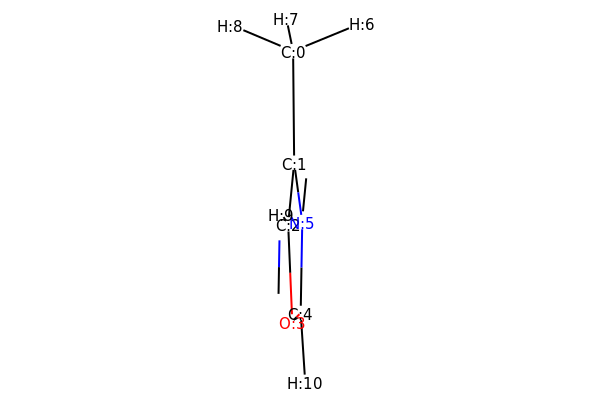

In [127]:
mol_with_atom_index(mol1)

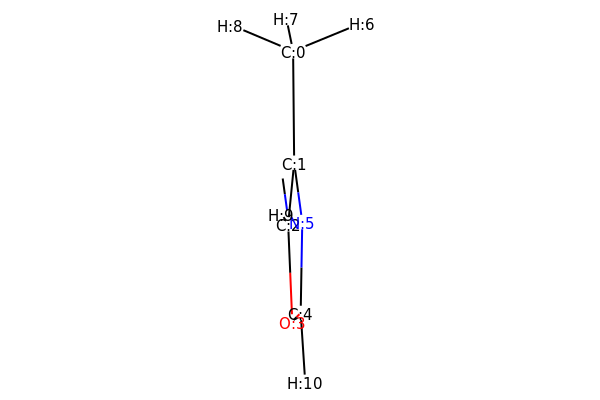

In [128]:
mol_with_atom_index(mol2)